In [1]:
#comment
#obervations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv("student.csv")

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
72+72+74/3

168.66666666666666

In [6]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


### shape of the data

In [16]:
data.shape

(1000, 8)

### information of data ( data type and null data)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
data['gender'].dtypes

dtype('O')

In [21]:
data['gender'].dtypes=='O'

True

### all columns of the data

In [22]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### categorical columns

In [24]:
cat_col=[fea for fea in data.columns if data[fea].dtype == 'O']

### numerical colums

In [25]:
num_col=[fea for fea in data.columns if data[fea].dtype != 'O']

In [26]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [27]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


### memory uses by the colums

In [29]:
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

## missing value

In [30]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [31]:
data.isnull().sum().sum()

0

In [32]:
data.duplicated().sum()

0

### unique values (or categories)

In [33]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [34]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

### Analysis of numerical data

### statistical values of data 

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


### correlation of numerical column of data

In [39]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


### covariance of numeical colums of data

In [40]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


### skewness of data 

if data is negetive then the graph will be left skewed, +ve the right skewed if 0 then perfect normally distributed

In [44]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

### visualizing the skewness of the data

<AxesSubplot:xlabel='math score', ylabel='Density'>

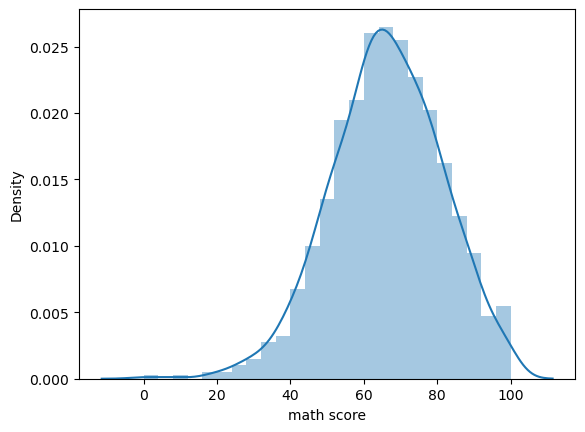

In [45]:
sns.distplot(data['math score'])

### taking the average of all the columns for each row and adding a new column for average

In [46]:
data['Avarge']=(data['math score']+data['reading score']+data['writing score'])/3

In [47]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### checking mean of numeric data for a categorical column 

In [49]:
data.groupby('gender').mean()

,math score,reading score,writing score,Avarge
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


### group by operation wrt category

In [51]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [52]:
#question: you have to find out no of student whoever is having less than 30 marks math

In [53]:
data[data["math score"] < 30].count()


gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
Avarge                         14
dtype: int64

In [62]:
data_num=data[num_col]

### plotting the numerical columns of the data

<AxesSubplot:xlabel='math score', ylabel='Density'>

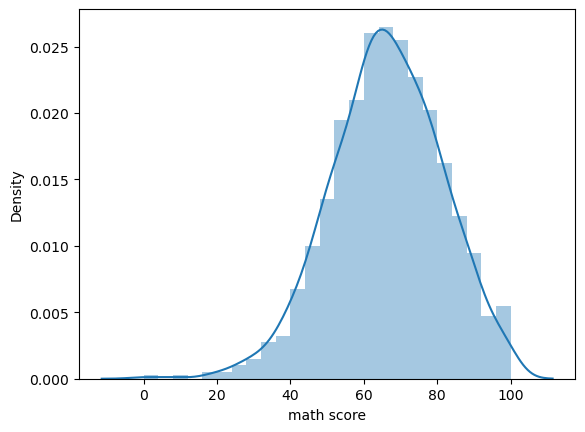

In [70]:
sns.distplot(data_num['math score'])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

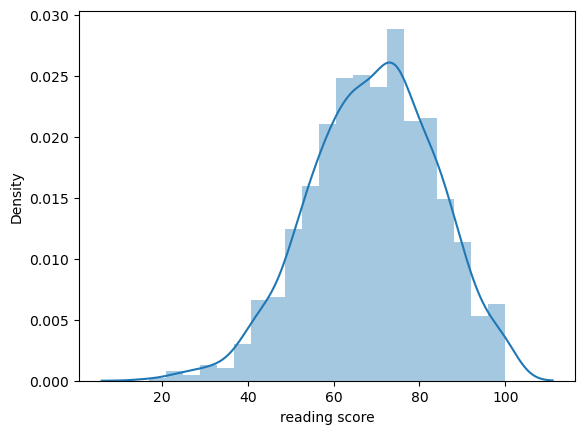

In [68]:
sns.distplot(data_num['reading score'])

<AxesSubplot:xlabel='writing score', ylabel='Density'>

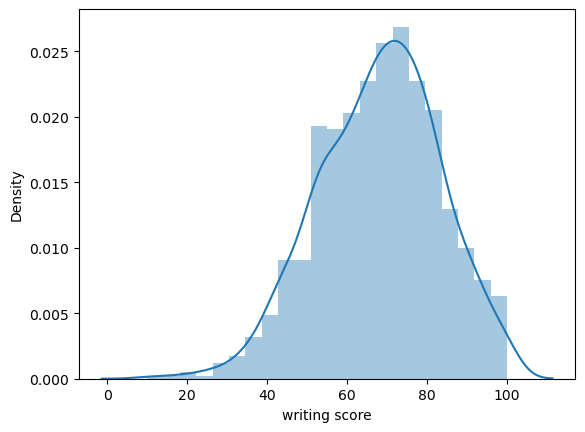

In [71]:
sns.distplot(data_num['writing score'])

### Checking for outlier 

#### plotting box plot to see if there are any outlier ( data outside the fence of the boxplot)

<AxesSubplot:>

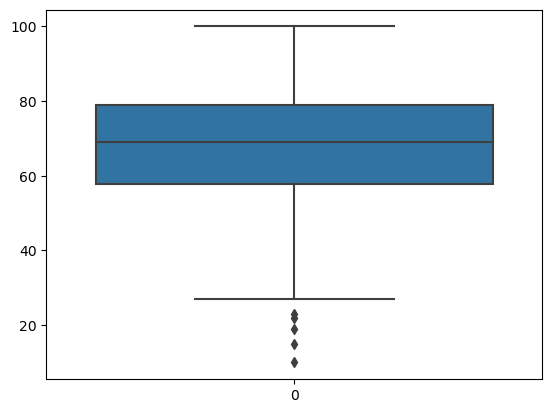

In [72]:
sns.boxplot(data=data['writing score'])


<AxesSubplot:>

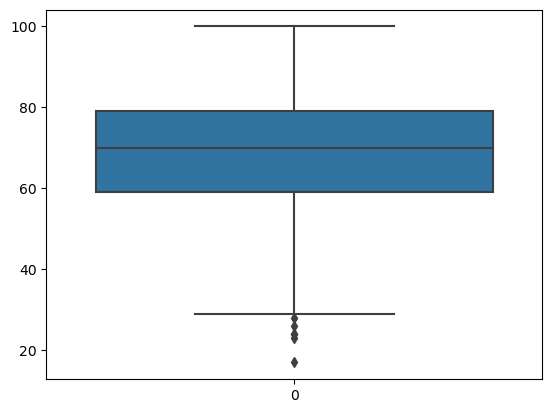

In [73]:
sns.boxplot(data=data['reading score'])


this data has got outlier we can clearly see them

### finding the outlier by Inter quanile range method

In [75]:
q1=data['math score'].quantile(0.25)

In [76]:
q3=data['math score'].quantile(0.75)

In [77]:
IQR=q3-q1

In [78]:
upper_limit=q3+(1.5*IQR)

In [79]:
upper_limit

107.0

In [80]:
lower_limit=q1-(1.5*IQR)

In [99]:
lower_limit

27.0

#### here are the all outliers

In [83]:
data_outlier=data[data['math score']<lower_limit]
data_outlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


### dropping the outliers

In [86]:
data_num.drop(data_outlier.index)
data_num

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [115]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


#### we got no outliers above the fence of the data 

In [88]:
data[data['math score']>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge


#### we can check the unique values there are no outliers

In [92]:
data['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

### function to create inter quantile range to eliminate outliers

In [93]:
def get_iqr(df, column_name, q1_range, q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5 * IQR
    lower_fence = q1 - 1.5 * IQR
    return IQR, upper_fence, lower_fence


In [163]:
data_num.loc[data_num['math score']<lower_limit,'math score']

Series([], Name: math score, dtype: int64)

In [110]:
data_num.loc[data_num['math score']<lower_limit,'math score']=lower_limit

In [111]:
data_num

,math score,reading score,writing score
0,72,72,74.0
1,69,79,79.0
2,77,79,79.0
3,47,57,44.0
4,76,78,75.0
...,...,...,...
995,77,79,79.0
996,62,55,55.0
997,59,71,65.0
998,68,78,77.0


### filling data in removed outlier places

In [96]:
def identifying_treating_outliers(df,col,remove_or_fill_with_quartile):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_fence=q1-1.5*(iqr)
  upper_fence=q3+1.5*(iqr)
  if remove_or_fill_with_quartile=="drop":
    df.drop(df.loc[df[col]<lower_fence].index,inplace=True)
    df.drop(df.loc[df[col]>upper_fence].index,inplace=True)
  elif remove_or_fill_with_quartile=="fill":
    df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])
    df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])



## graph analysis

In [97]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


### couting all the data in category by countplot

<AxesSubplot:xlabel='gender', ylabel='count'>

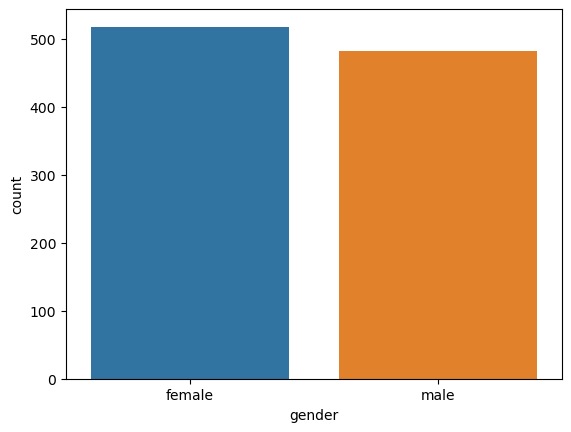

In [99]:
sns.countplot(data['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

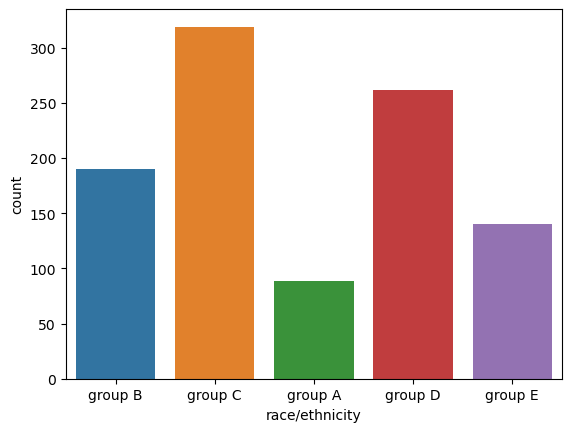

In [100]:
sns.countplot(data['race/ethnicity'])

### statistical analysis of the categorical data 

In [109]:
df=data.groupby('gender').mean()

In [110]:
df

,math score,reading score,writing score,Avarge
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


average of females-

In [113]:
df['Avarge'][0]

69.56949806949807

average of males

In [114]:
df['Avarge'][1]

65.8374827109267

In [115]:
df['math score'][0]

63.633204633204635

In [116]:
df['math score'][1]

68.72821576763485

In [120]:
female_score=df['Avarge'][0],df['math score'][0]

In [125]:
female_score  #average and maths score

(69.56949806949807, 63.633204633204635)

In [126]:
male_score=df['Avarge'][1],df['math score'][1]
male_score   #average and maths score

(65.8374827109267, 68.72821576763485)

<BarContainer object of 2 artists>

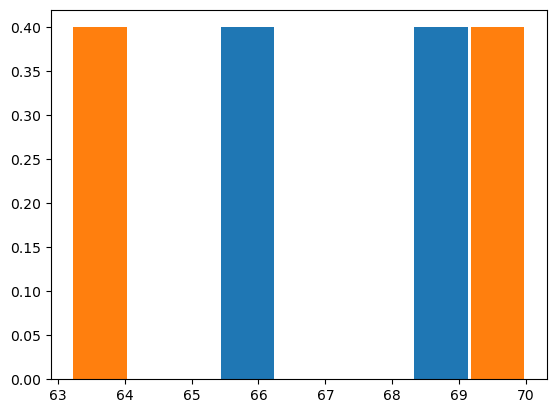

In [127]:
plt.bar(male_score,0.4,label='male')
plt.bar(female_score,0.4,label='female')


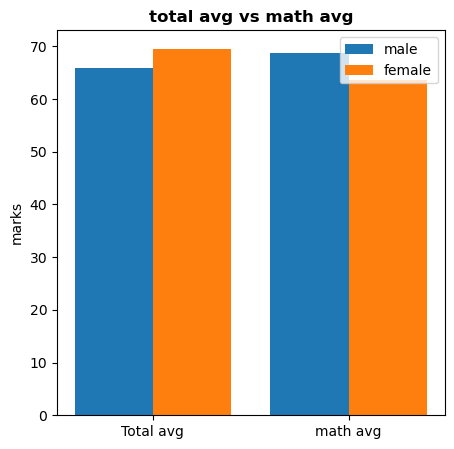

In [129]:
plt.figure(figsize=(5,5))
X=['Total avg','math avg']
female_score=df['Avarge'][0],df['math score'][0]
male_score=df['Avarge'][1],df['math score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight='bold')
plt.legend()
plt.show()

In [138]:
data_num.head()

,math score,reading score,writing score
0,72,72,74.0
1,69,79,79.0
2,77,79,79.0
3,47,57,44.0
4,76,78,75.0


In [137]:
data_num.corr()

,math score,reading score,writing score
math score,1.000000,0.799114,0.785275
reading score,0.799114,1.000000,0.949053
writing score,0.785275,0.949053,1.000000


### ploltting the corrrelation with the help of heat map

<AxesSubplot:>

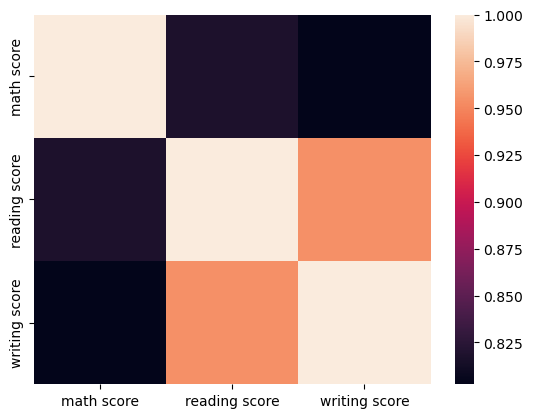

In [130]:
sns.heatmap(data_num.corr())

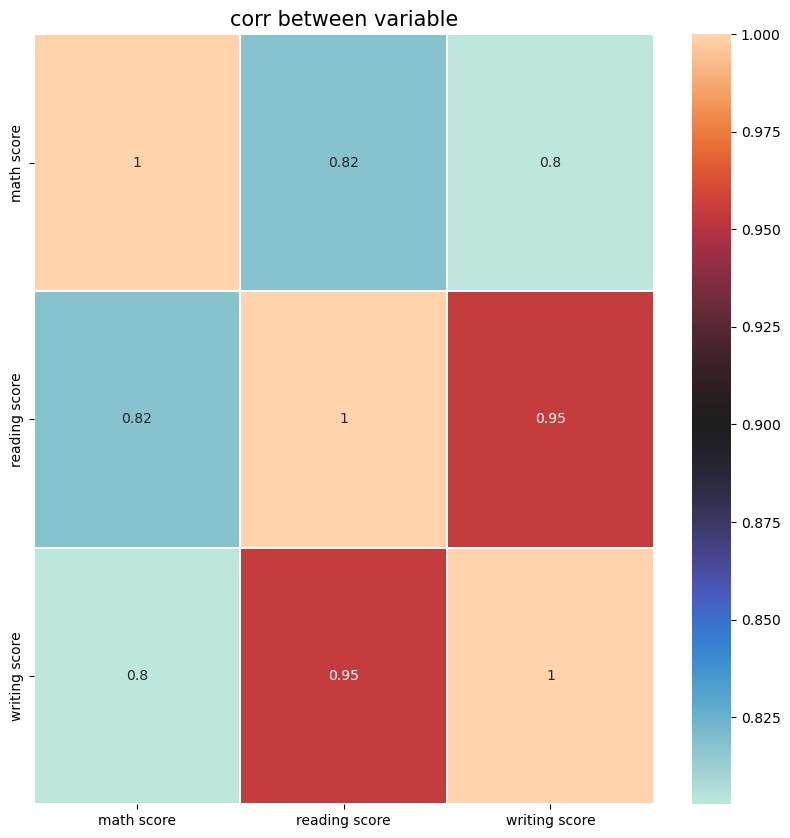

In [131]:
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

### plotting pairplot of the numeric columns of the data (with respect to each other )

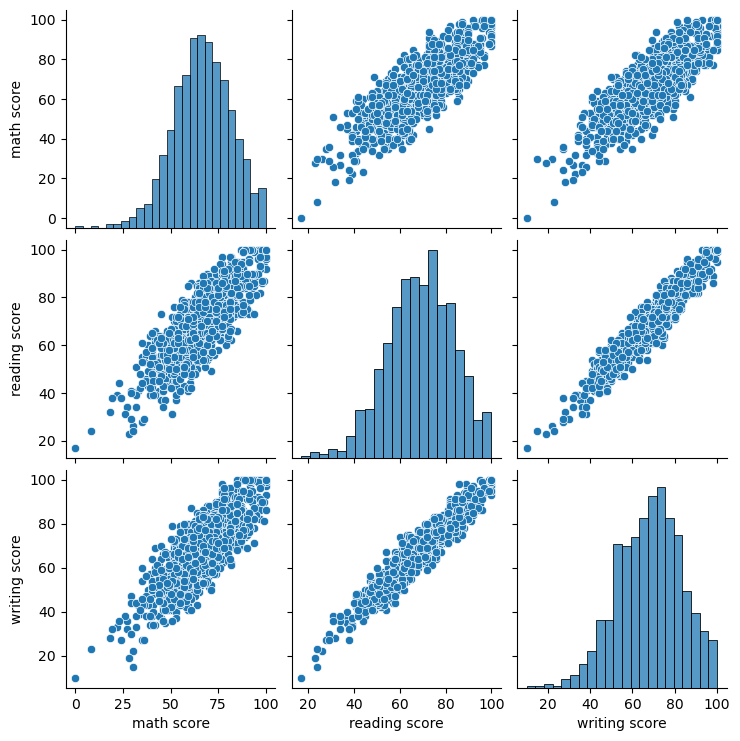

In [132]:
sns.pairplot(data_num)

### voilin plot to see the distributin of value in the columns of the data 

<AxesSubplot:>

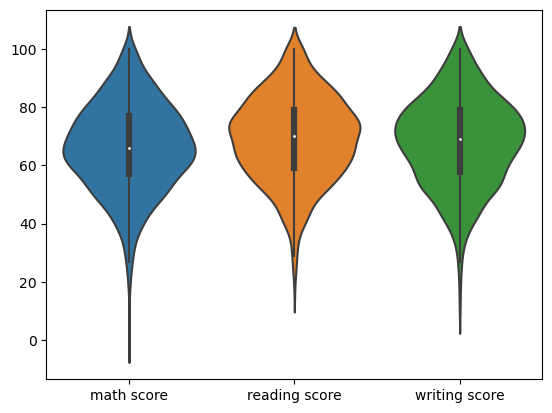

In [133]:
sns.violinplot(data=data_num)